# Lorenz Equations

In [42]:
import numpy as np
from numpy import linalg
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from IPython.display import HTML

In [32]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [43]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    #define constants
    σ, ρ, β = 10, 28, 8/3.
    #return pde system
    return np.array([σ*(x[1] - x[0]), ρ*x[0] - x[1] - x[0]*x[2], x[0]*x[1] - β*x[2]])

In [44]:
#plot solution function
def plot_solution_lorenz(num_sols = 1):
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111, projection = '3d')
    t = np.linspace(0, 75, 10000)
    colors = ['b-', 'r-', 'c-']
    for i in range(num_sols):
        #set intial conditions and get solution
        x0 = np.random.uniform(low = -15, high=15, size=3)
        sol = odeint(lorenz, x0, t)
        #plot the figure
        ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], colors[i], linewidth=1)
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    return

<IPython.core.display.Javascript object>


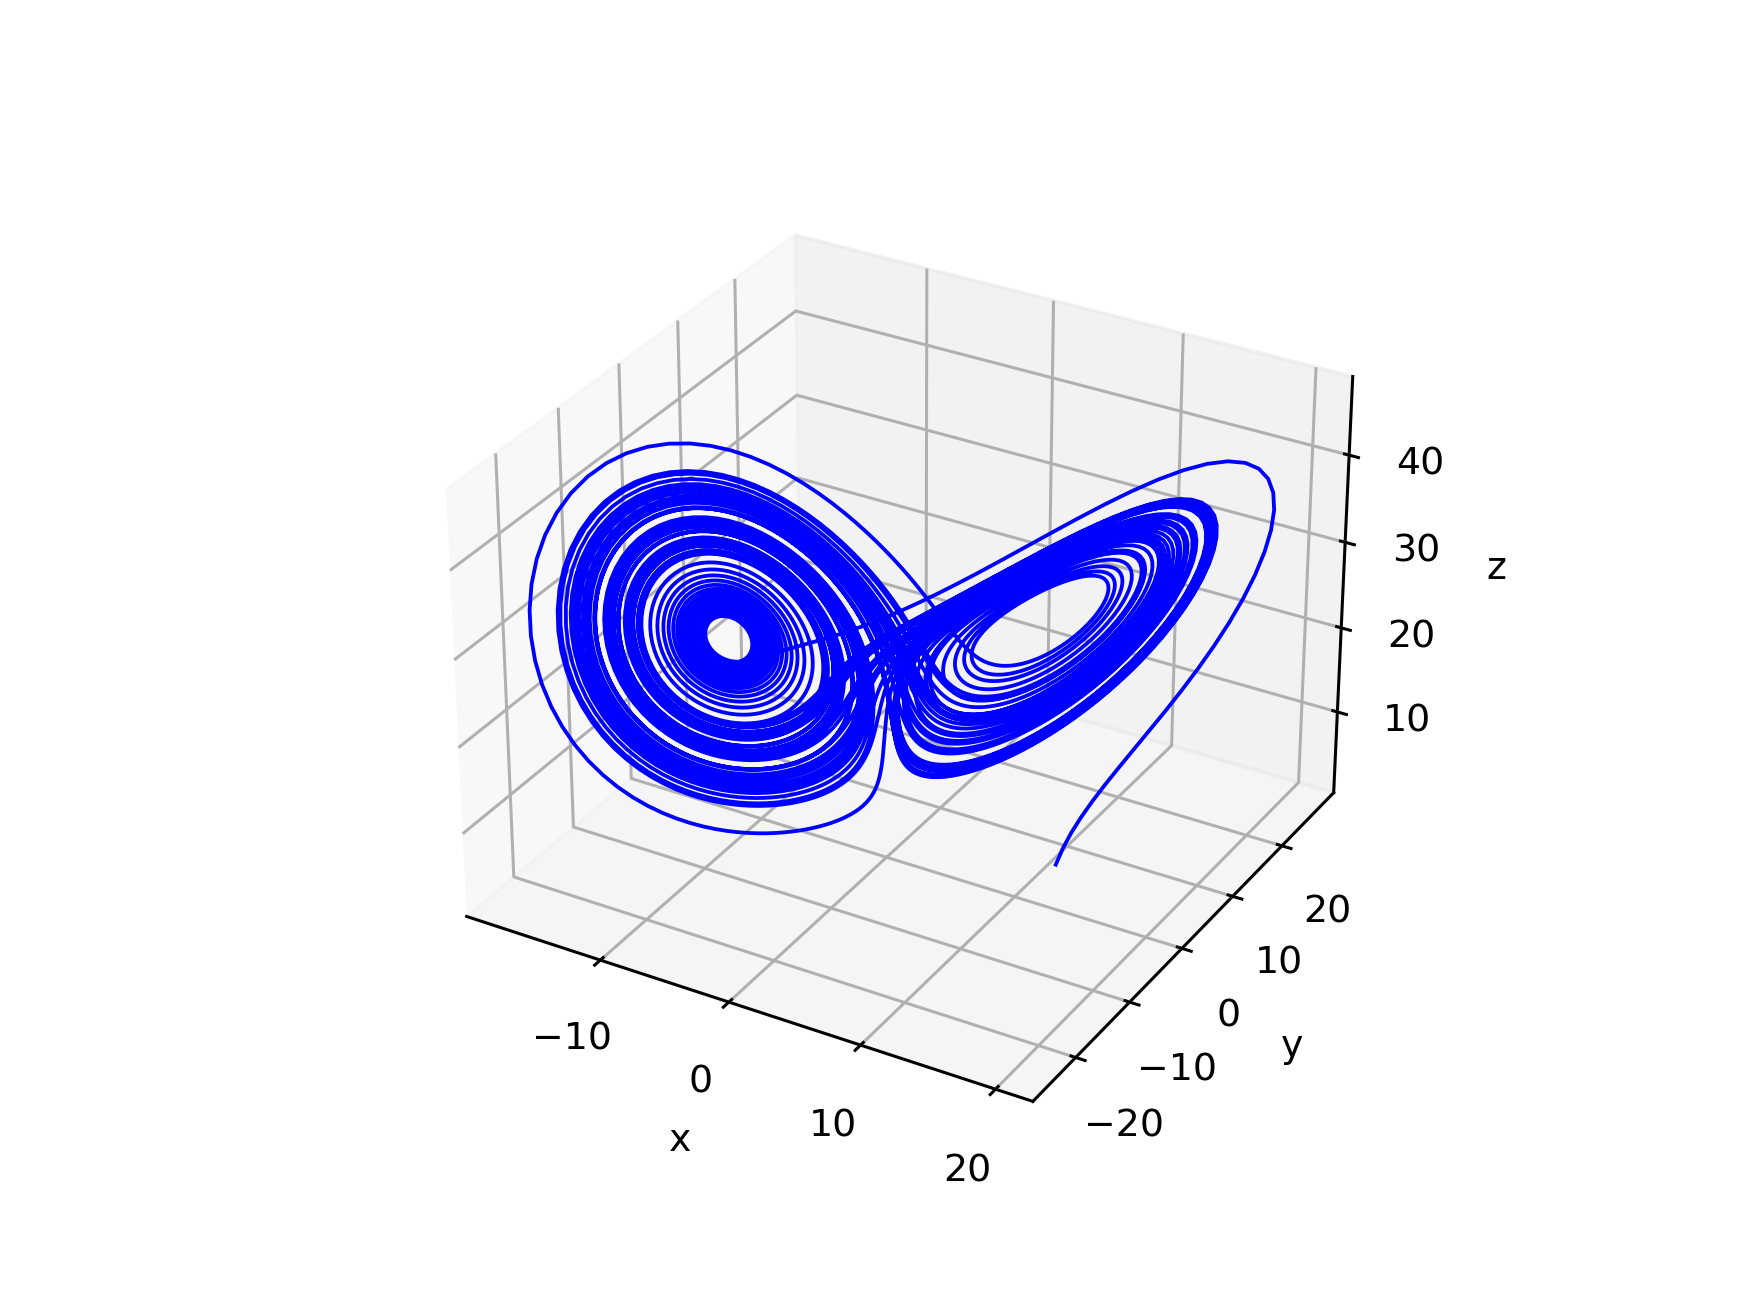

In [46]:
plot_solution_lorenz()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


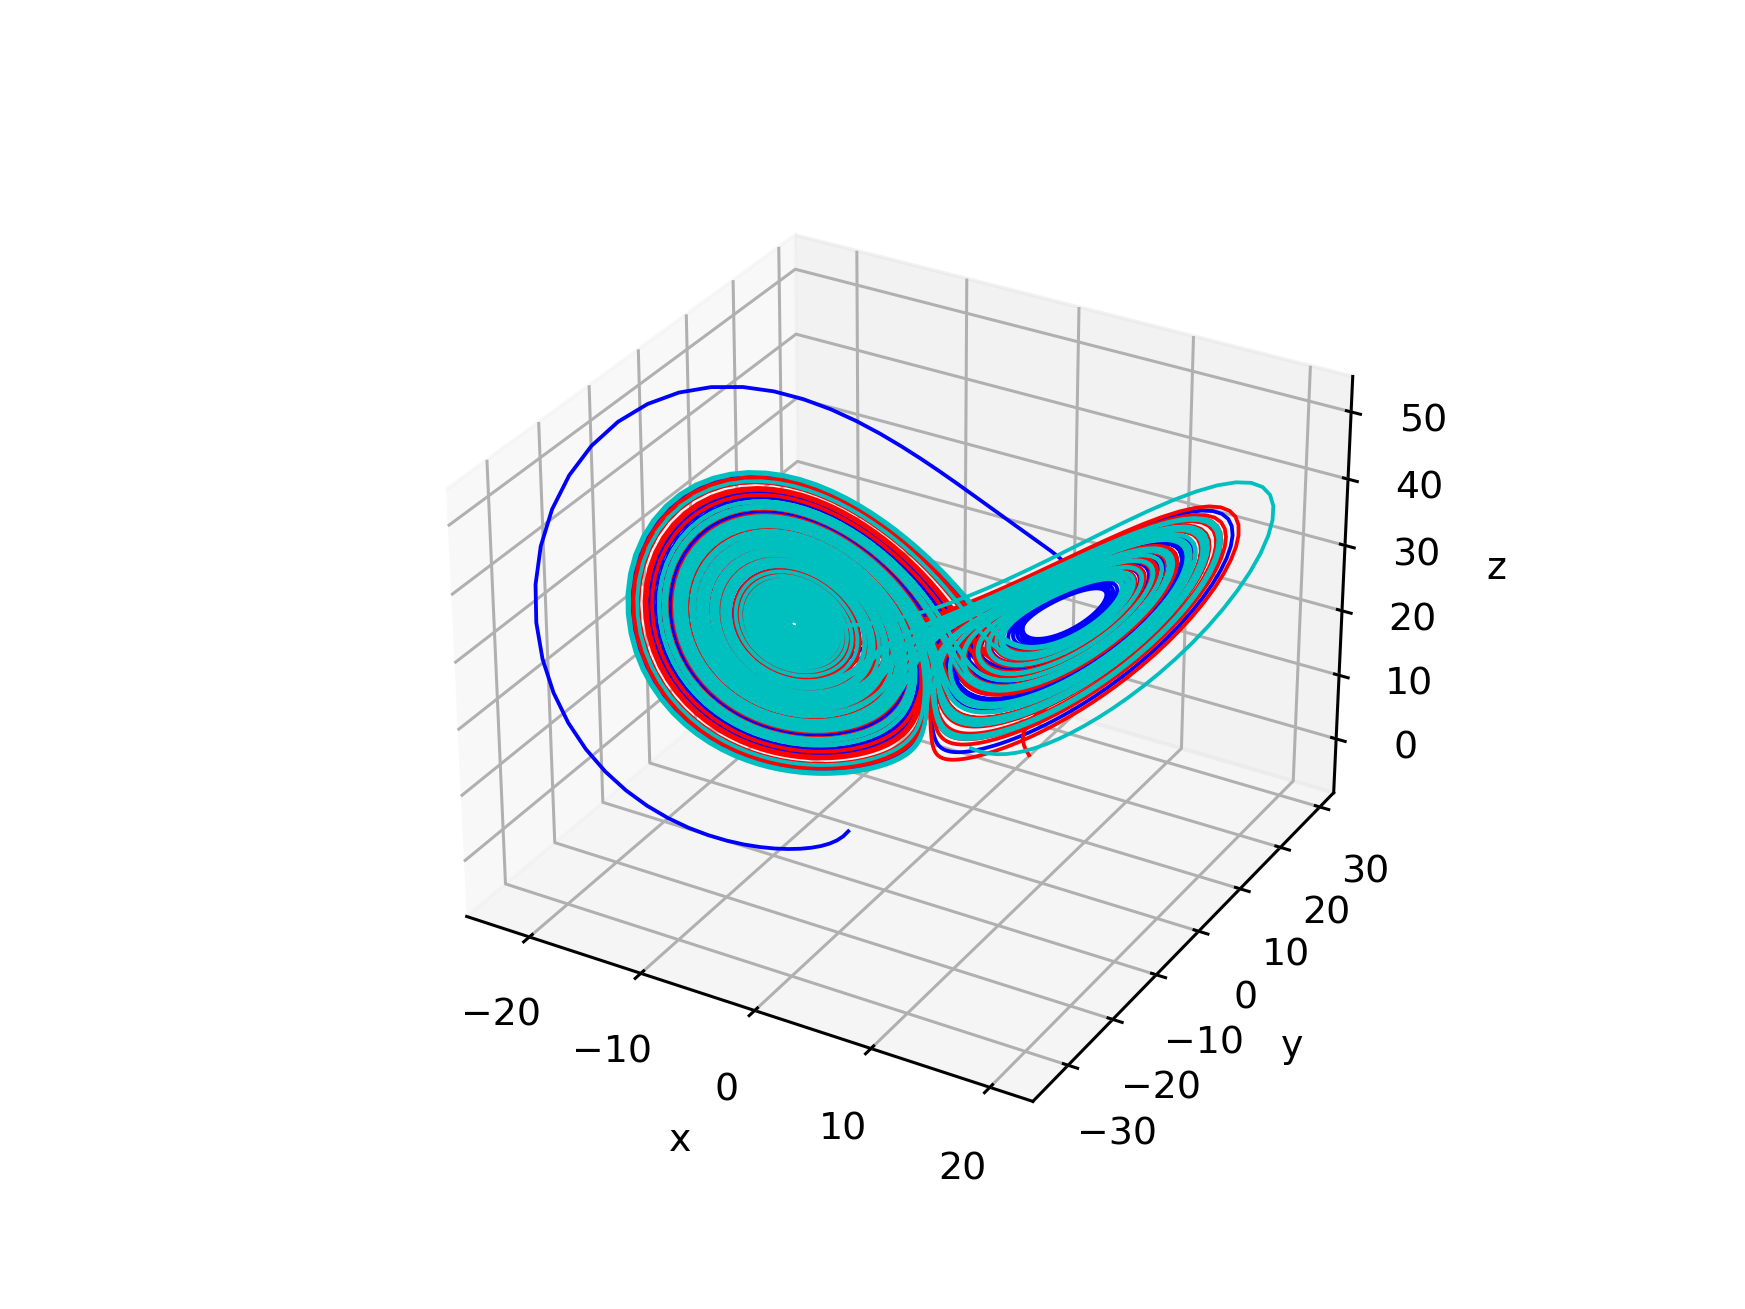

In [47]:
plot_solution_lorenz(num_sols=3)

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [48]:
#get two different solutions with initial conditions a random perturbation
x0_1 = np.random.uniform(low = -15, high=15, size=3)
perturbation = np.random.randn(3)*1e-10
x0_2 = x0_1 + perturbation
t = np.linspace(0, 75, 3000)
sol1 = odeint(lorenz, x0_1, t)
sol2 = odeint(lorenz, x0_2, t)

#update function
def update3d(i):
    #set data for solution 1
    sol_1.set_data(sol1[i, 0], sol1[i, 1])
    sol_1.set_3d_properties(sol1[i, 2])
    sol_1_traj.set_data(sol1[:i+1, 0], sol1[:i+1, 1])
    sol_1_traj.set_3d_properties(sol1[:i+1, 2])
    
    #set data for solution 2
    sol_2.set_data(sol2[i, 0], sol2[i, 1])
    sol_2.set_3d_properties(sol2[i, 2])
    sol_2_traj.set_data(sol2[:i+1, 0], sol2[:i+1, 1])
    sol_2_traj.set_3d_properties(sol2[:i+1, 2])
    
    return    
    
#set animation settings
plt.ioff()

#create figure and set limits
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Chaotic Behavior')
fig.set
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([-10, 50])

#first solution
sol_1, = ax.plot([], [], [], marker='o', color='r', label='Soluiton 1')
sol_1_traj, = ax.plot([], [],[], color='r', alpha=0.5)

#second solution
sol_2, = ax.plot([], [], [], marker='o', color='b', label='Solution 2')
sol_2_traj, = ax.plot([], [],[], color='b', alpha=0.5)
ax.legend(loc='best')
                                      
#get the animation                                      
ani = animation.FuncAnimation(fig, update3d, frames=range(1500), interval=15)
HTML(ani.to_html5_video())

#####old code
#animation.writer = animation.writers['ffmpeg']
#ani.save('lorenz_animation.mp4')
#<video src="lorenz_animation.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [49]:
#get two different solutions with the same initial condition using different tolerances
x0 = np.random.uniform(low = -15, high=15, size=3)
t = np.linspace(0, 75, 3000)
sol1 = odeint(lorenz, x0, t, atol=1e-15, rtol=1e-13)
sol2 = odeint(lorenz, x0, t, atol=1e-12, rtol=1e-10)

#update function
def update3d(i):
    #set data for solution 1
    sol_1.set_data(sol1[i, 0], sol1[i, 1])
    sol_1.set_3d_properties(sol1[i, 2])
    sol_1_traj.set_data(sol1[:i+1, 0], sol1[:i+1, 1])
    sol_1_traj.set_3d_properties(sol1[:i+1, 2])
    
    #set data for solution 2
    sol_2.set_data(sol2[i, 0], sol2[i, 1])
    sol_2.set_3d_properties(sol2[i, 2])
    sol_2_traj.set_data(sol2[:i+1, 0], sol2[:i+1, 1])
    sol_2_traj.set_3d_properties(sol2[:i+1, 2])
    
    return
    
#set animation settings
plt.ioff()

#create figure and set limits
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Chaotic Behavior')
fig.set
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-20, 20])
ax.set_ylim([-30, 30])
ax.set_zlim([-10, 50])

#first solution
sol_1, = ax.plot([], [], [], marker='o', color='r', label='Soluiton 1')
sol_1_traj, = ax.plot([], [],[], color='r', alpha=0.5)

#second solution
sol_2, = ax.plot([], [], [], marker='o', color='b', label='Solution 2')
sol_2_traj, = ax.plot([], [],[], color='b', alpha=0.5)
ax.legend(loc='best')
                                      
#get the animation                                      
ani = animation.FuncAnimation(fig, update3d, frames=range(1500), interval=15)
HTML(ani.to_html5_video())

###old code
#animation.writer = animation.writers['ffmpeg']
#ani.save('lorenz_animation2.mp4')
#<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


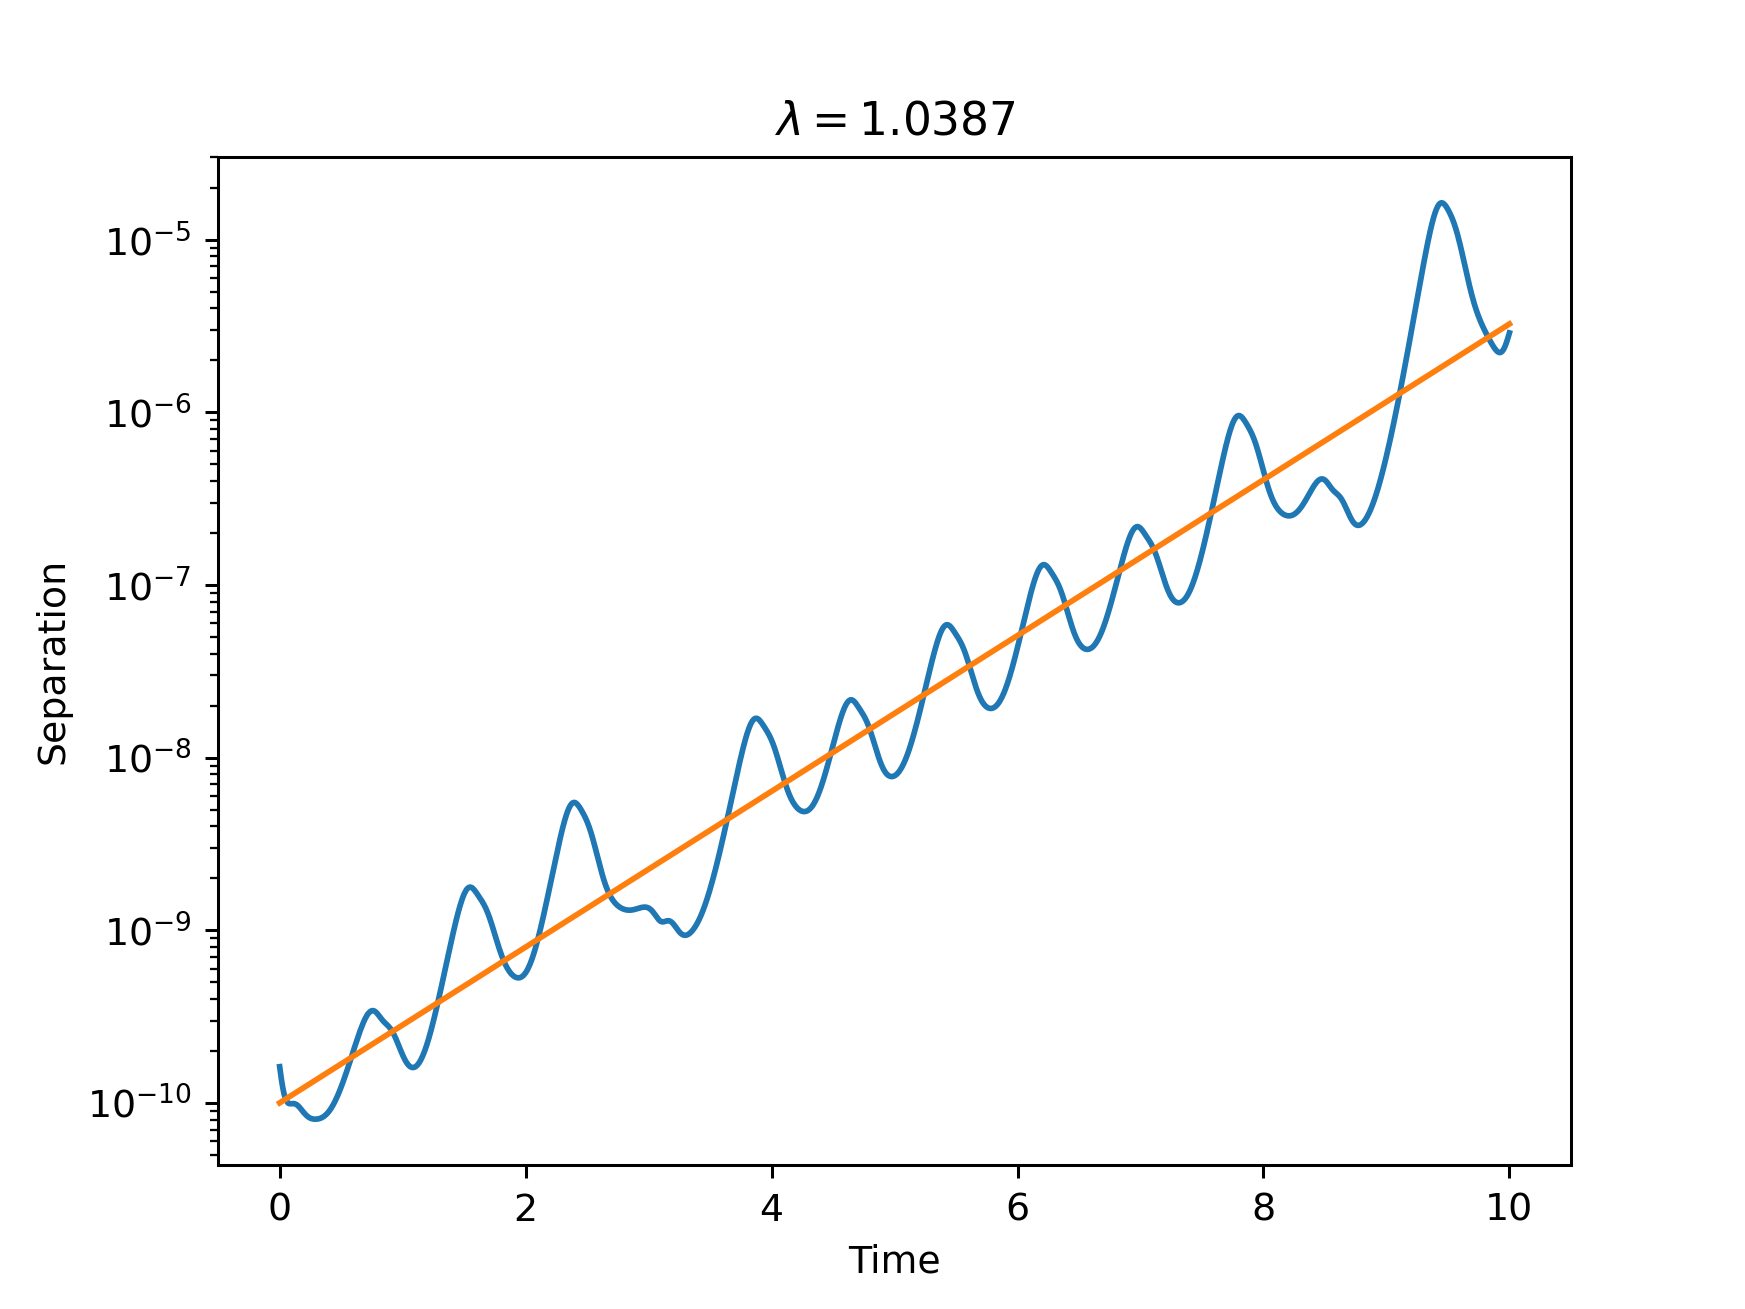

In [68]:
#get random intitial condition
x0 = np.random.uniform(low = -15, high=15, size=3)
t = np.linspace(0, 20, 500)
#solve with the initial condition
sol = odeint(lorenz, x0, t)
#get new initial condition in attractor
x0A = sol[-1]
#get perturbation
perturbation = np.random.randn(3)*1e-10
#get initial condition with perturbation
x0p = x0A + perturbation
t1 = np.linspace(0, 10, 2000)
#get two solutions and difference
solA = odeint(lorenz, x0A, t1)
solP = odeint(lorenz, x0p, t1)
difference = solP - solA
#take the norm
normed = linalg.norm(difference, axis=1)
#now get the linear regression
slope, intercept = linregress(t1, np.log(normed))[:2]

#now we plot
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.semilogy(t1, normed)
ax.semilogy(t1, np.exp(slope*t1 + intercept))
ax.set_title(r'$\lambda = $' + str(round(slope, 4)))
ax.set_xlabel('Time')
ax.set_ylabel('Separation')
plt.show()